In [2]:
!pip install -q qiskit
!pip install -q pylatexenc
!pip install -q azure-quantum[qiskit]
!pip install -q qiskit_machine_learning


!pip install -q pennylane
!pip install -q pennylane-sf --upgrade

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Load the Iris dataset into the variable 'iris_data'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import numpy as np
import torch
import qiskit
import pennylane as qml
import ipywidgets as widgets

from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from IPython.display import display
from qiskit.circuit.library import ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, ADAM, SPSA
from qiskit.opflow import PauliSumOp
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import VQC
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from qiskit.primitives import Sampler
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.decomposition import PCA
from torch.nn.functional import relu
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from qiskit.circuit.library import EfficientSU2
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers
from pennylane.operation import Tensor

np.random.seed(42)

In [5]:
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Total of 150 samples (instances) with 4 featurers (attributes) and 3 labels (classes)

In [18]:
features = iris_data.data
labels = iris_data.target

print(features.shape)
print(labels.shape)

(150, 4)
(150,)


In [19]:
# View of the features data.
features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

We see that the features array is not normalised with values of different ranges for example we have [4.3, 7.9] and [0.1, 2.5]. For this approach we will use a simple transformation approach in which we can set the ranges to a [0, 1] interval.

In [20]:
# Fit the scaler to the features data and transform it
features = MinMaxScaler().fit_transform(features)
features.shape

(150, 4)

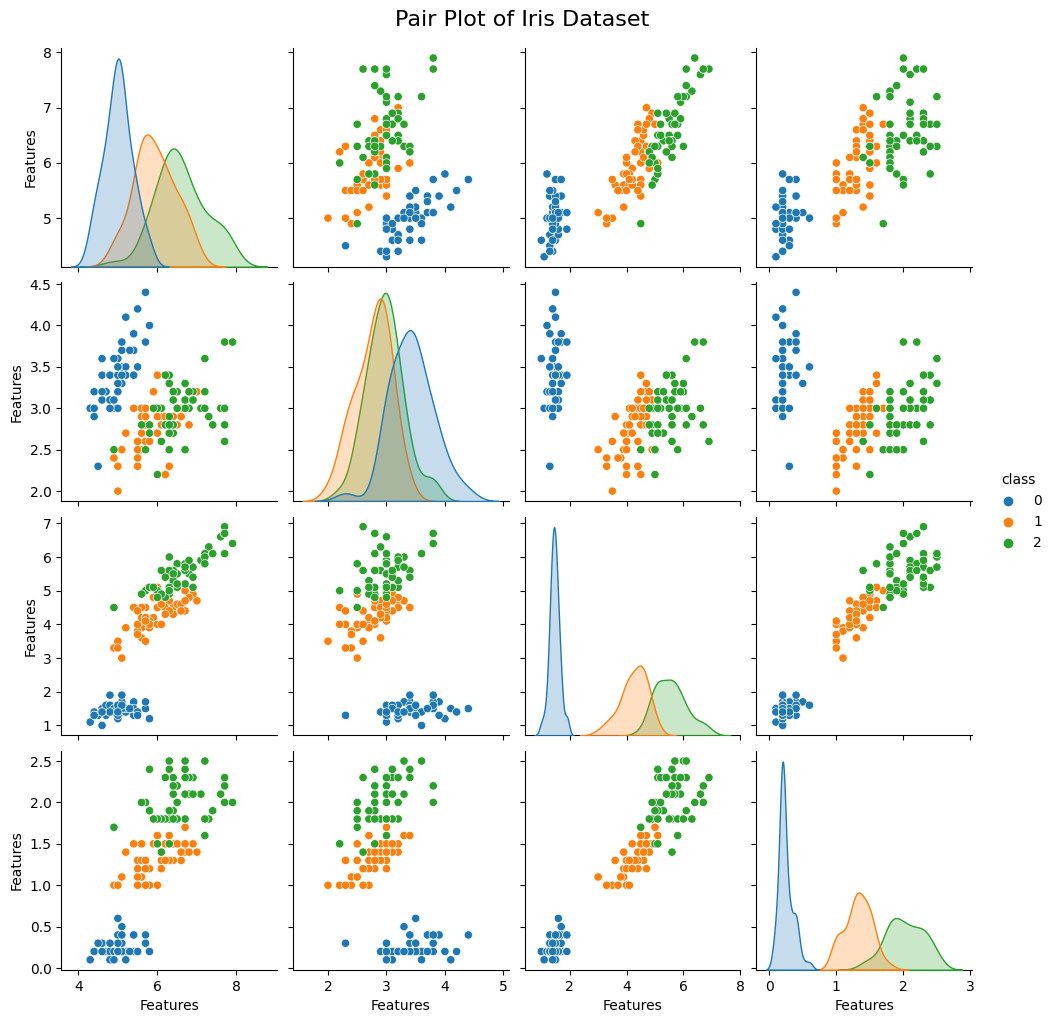

In [21]:
# Create a DataFrame from the Iris dataset
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["class"] = pd.Series(iris_data.target)

# Generate a pair plot with detailed output
pairplot = sns.pairplot(df, hue="class", palette="tab10")

# Add informative titles and axis labels
pairplot.fig.suptitle("Pair Plot of Iris Dataset", y=1.02, fontsize=16)
pairplot.set(xlabel="Features", ylabel="Features")

# Display the pair plot
plt.show()

From this data visualisation we can see that plots for class 0 potray more separability whilst for class 1 and 2 there is more intertwined relationship especially with the sepal width feature this will contribute to feature engineering.

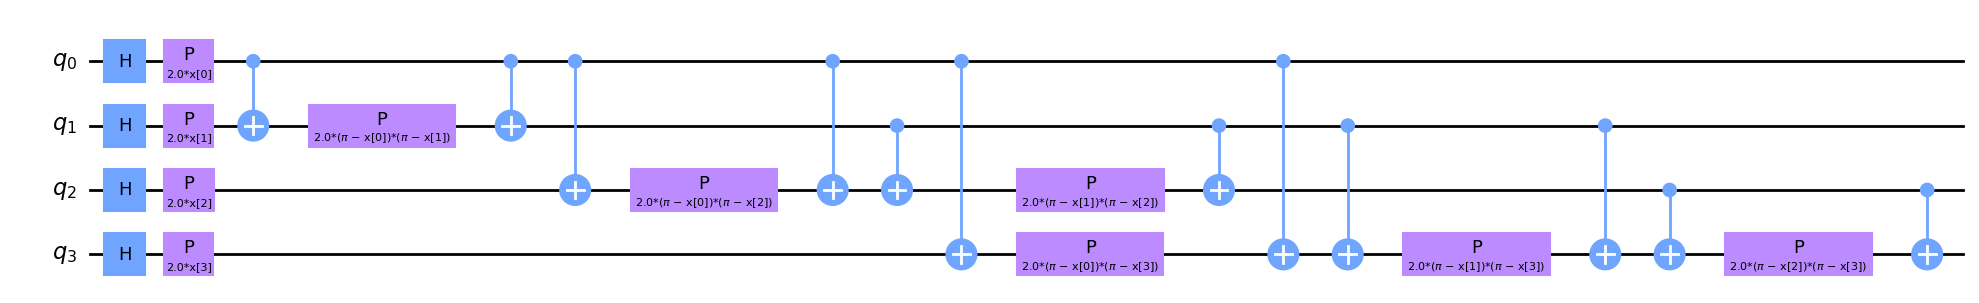

In [22]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=30)

If you look closely at the feature map diagram, you will notice parameters x[0], ..., x[3]. These are placeholders for our features.

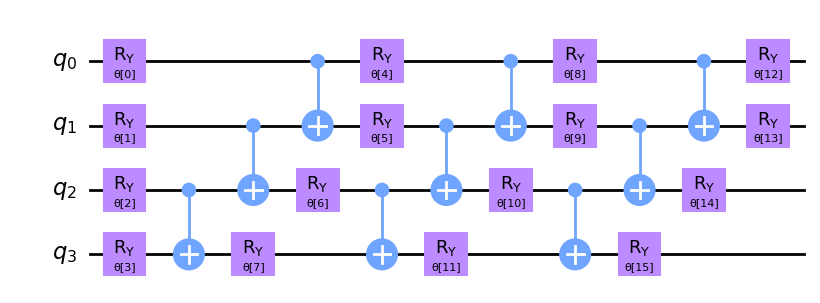

In [23]:
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

This circuit has 16 parameters named θ[0], ..., θ[15]. These are the trainable weights of the classifier.

We then choose an optimization algorithm to use in the training process. This step is similar to what you may find in classical deep learning frameworks. To make the training process faster, we choose a gradient-free optimizer. You may explore other optimizers available in Qiskit

In [24]:
# Constrained Optimization by Linear Approximation to optimize classical parameters associated with quantum circuits rather than directly optimizing quantum states.
optimizer = COBYLA(maxiter=100)

Train classifier on a simulator cause we are still classical.

Introduce the sampler:
A Sampler is a special tool that helps us perform calculations and experiments on the quantum computer or simulator. We create an instance of the Sampler and give it the name "sampler."

In [25]:
sampler = Sampler()

Now, we want to keep track of how well our classifier is doing as it goes through the training process. So, we add something called a "callback function," which is like a special function that gets called or activated at certain points during the training. We give our callback function the name "callback_graph."

In [26]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [30]:
algorithm_globals.random_seed = 123

# Split the data into train and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=algorithm_globals.random_seed)

# # Further split the train set into train and validation sets
# train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=0.3, random_state=algorithm_globals.random_seed)

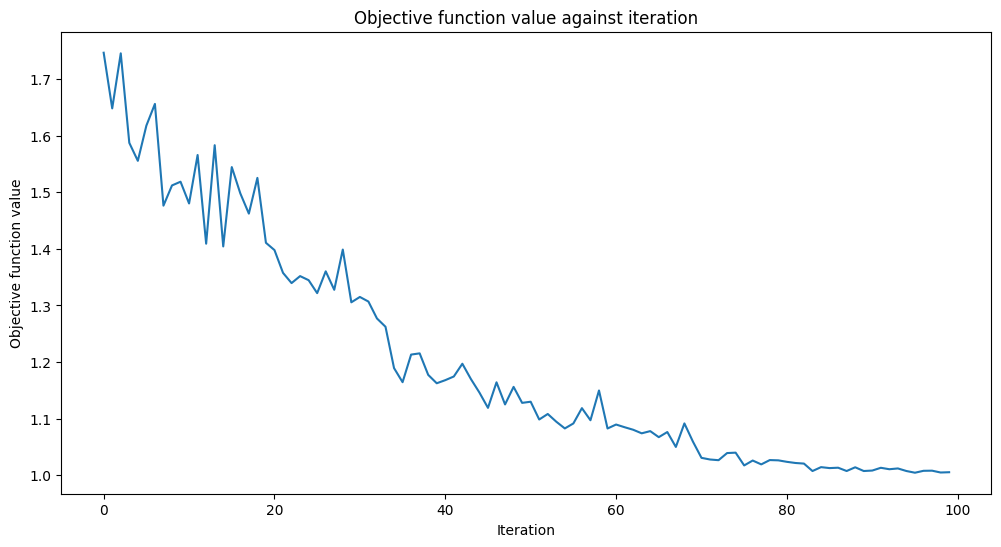

Training time: 168 seconds


In [31]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [33]:
train_score_q4 = vqc.score(train_features, train_labels)
# validation_score_q4 = vqc.score(val_features, val_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
# print(f"Quantum VQC on the validation dataset: {validation_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.85
Quantum VQC on the test dataset:     0.87


In [45]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Predict labels for the test set
y_pred = vqc.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)

# Calculate precision
precision = precision_score(test_labels, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(test_labels, y_pred, average='weighted')

# Calculate recall
recall = recall_score(test_labels, y_pred, average='weighted')

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score:  {f1:.2f}")
print(f"Recall:    {recall:.2f}")


Accuracy:  0.87
Precision: 0.88
F1 Score:  0.86
Recall:    0.87


In [46]:
# Create a logistic regression CL_model_LR
CL_model_LR = LogisticRegression()

# Train the CL_model_LR
CL_model_LR.fit(train_features, train_labels)

# Make predictions on the test set
y_pred_model1 = CL_model_LR.predict(test_features)

In [47]:
# Calculate accuracy
accuracyLR = accuracy_score(test_labels, y_pred_model1)

# Calculate precision
precisionLR = precision_score(test_labels, y_pred_model1, average='weighted')

# Calculate F1 score
f1LR = f1_score(test_labels, y_pred_model1, average='weighted')

# Calculate recall
recallLR = recall_score(test_labels, y_pred_model1, average='weighted')

print(f"Accuracy:  {accuracyLR:.2f}")
print(f"Precision: {precisionLR:.2f}")
print(f"F1 Score:  {f1LR:.2f}")
print(f"Recall:    {recallLR:.2f}")

Accuracy:  0.97
Precision: 0.97
F1 Score:  0.97
Recall:    0.97


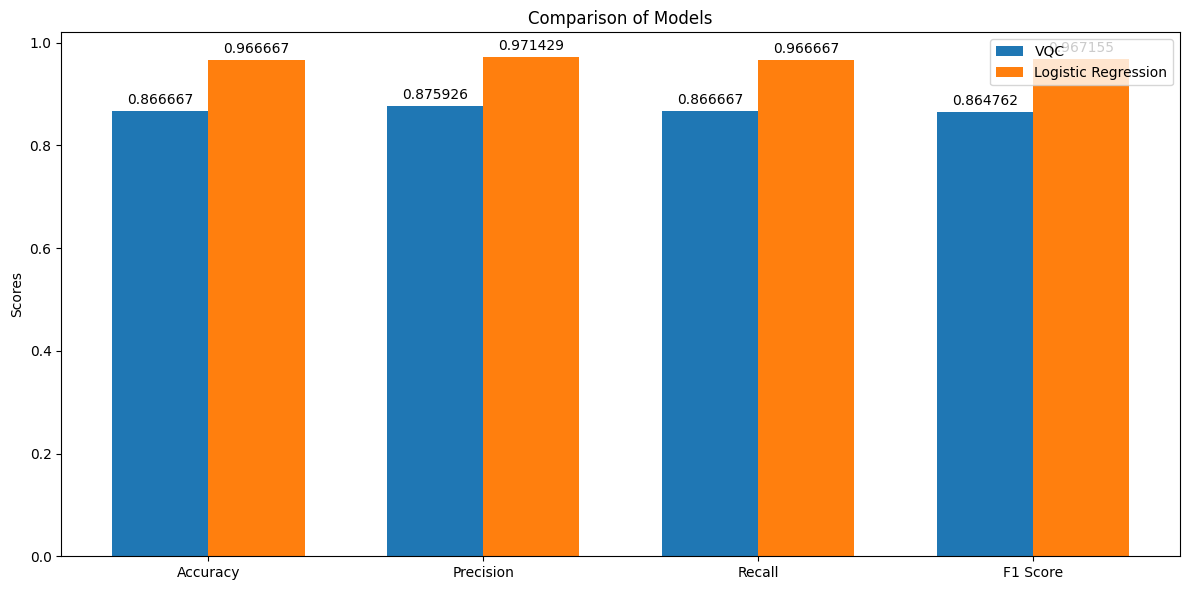

In [48]:
# Bar chart
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
VQC_scores = [accuracy, precision, recall, f1]
LR_scores = [accuracyLR, precisionLR, recallLR, f1LR]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, VQC_scores, width, label='VQC')
rects2 = ax.bar(x + width/2, LR_scores, width, label='Logistic Regression')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()